In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# import all datasets
pollution = pd.read_csv('city_year_pollution_counties.csv')
houses_price_yr = pd.read_excel('houses_price_yr.xlsx')
pop_density = pd.read_excel('pop_density_2010-2019.xlsx')

In [39]:
pollution = pollution.drop(columns=['avg_day'])
pollution.columns = ['year', 'county_name', 'pollutant', 'units', 'pollution_year']
pollution.head()

,year,county_name,pollutant,units,pollution_year
0,2000,Baix Llobregat,PM10,µg/m3,55.404043
1,2000,Barcelonès,PM10,µg/m3,41.211248
2,2001,Baix Llobregat,PM10,µg/m3,58.345918
3,2001,Barcelonès,PM10,µg/m3,37.739720
4,2002,Baix Llobregat,PM10,µg/m3,54.781478


In [40]:
pop_density.columns = ['year', 'county_name', 'area_Km2', 'population', 'pop_density']
pop_density.head()

,year,county_name,area_Km2,population,pop_density
0,2010,Alt Camp,23.391304,1970,76.671326
1,2010,Alt Empordà,19.963824,2062,116.542224
2,2010,Alt Penedès,21.951481,3873,286.494849
3,2010,Alt Urgell,76.182105,1158,55.464751
4,2010,Alta Ribagorça,142.286667,1426,11.189835


In [41]:
houses_price_yr.head()

,county_name,year,avg_price
0,Alt Camp,2013,1781.92
1,Alt Empordà,2013,2572.35
2,Alt Penedès,2013,1786.45
3,Alt Urgell,2013,1808.72
4,Alta Ribagorça,2013,469.36


In [42]:
density_house = pop_density.merge(houses_price_yr, on=['county_name', 'year'], how='inner')
density_house

,year,county_name,area_Km2,population,pop_density,avg_price
0,2013,Alt Camp,23.391304,1946,76.008223,1781.92
1,2013,Alt Empordà,19.963824,2078,118.127447,2572.35
2,2013,Alt Penedès,21.951481,3934,293.121234,1786.45
3,2013,Alt Urgell,76.182105,1112,52.912192,1808.72
4,2013,Alta Ribagorça,142.286667,1365,10.608538,469.36
...,...,...,...,...,...,...
280,2019,Tarragonès,14.516364,11669,592.782359,2200.89
281,2019,Terra Alta,61.920000,957,14.803389,1563.21
282,2019,Urgell,28.983000,1834,43.917691,1289.72
283,2019,Vallès Occidental,25.353478,40227,2233.742875,3636.03


In [43]:
pollution_density_house = density_house.merge(pollution, on=['county_name', 'year'], how='inner')
pollution_density_house.head(50)

,year,county_name,area_Km2,population,pop_density,avg_price,pollutant,units,pollution_year
0,2013,Alt Penedès,21.951481,3934,293.121234,1786.45,PM10,µg/m3,17.546365
1,2013,Bages,37.116857,5306,203.505493,1593.08,PM10,µg/m3,22.482495
2,2013,Baix Camp,24.898214,6909,206.119406,1925.52,PM10,µg/m3,14.276010
3,2013,Baix Llobregat,16.199667,26954,2358.468835,2882.48,PM10,µg/m3,26.624834
4,2013,Barcelonès,29.150000,448087,14605.597491,4015.35,PM10,µg/m3,24.288709
5,2013,Berguedà,38.233871,1308,63.441626,2410.61,PM10,µg/m3,13.546238
6,2013,Cerdanya,32.158235,1095,51.953581,4684.57,PM10,µg/m3,12.927017
7,2013,Garraf,30.851667,24434,798.724096,3408.68,PM10,µg/m3,21.326635
8,2013,Maresme,13.284333,14581,2028.830353,2299.91,PM10,µg/m3,17.710417
9,2013,Montsià,61.285000,5964,94.325023,1253.08,PM10,µg/m3,17.115323


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11865CE8>,
      dtype=object)

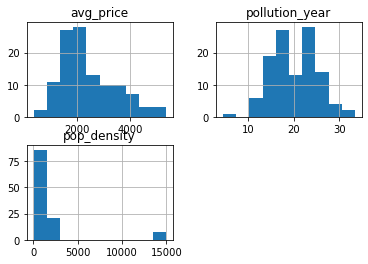

In [52]:
pollution_density_house.hist(['pop_density', 'avg_price', 'pollution_year'])

In [54]:
pollution_density_house.to_csv('data_united.csv', index = False)
pollution_density_house.to_excel('data_united.xlsx', index = False)